In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
from data_preprocessing_final import initiate_data

In [3]:
data = pd.read_csv('Ames_HousePrice.csv', index_col=0)

In [4]:
train_data_linear, train_target_linear, test_data_linear, test_target_linear, train_data_tree, train_target_tree, test_data_tree, test_target_tree = initiate_data(data)

In [5]:
train_data_tree

,PID,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Bsmt_Unfin_Ratio,TotalLivArea,TotalBath
0,923125030,0.0,1.0,3.0,4.0,0.0,14.0,0.0,0.0,2.0,...,0.491228,0.181452,0.000000,0.000000,0.133399,0.0,0.000000,-0.166667,1600.0,-0.054562
1,902207150,6.0,1.0,3.0,4.0,0.0,20.0,2.0,0.0,2.0,...,0.350877,0.322581,0.000000,0.000000,0.181818,0.0,0.000000,0.000000,1936.0,-0.054644
2,902106060,6.0,1.0,3.0,0.0,0.0,20.0,2.0,0.0,5.0,...,0.789474,0.290323,0.000000,0.503509,0.000000,0.0,0.000000,0.000000,3366.0,-0.054480
3,528120030,5.0,0.0,3.0,4.0,0.0,19.0,2.0,0.0,2.0,...,0.991228,0.622984,0.117978,0.078947,0.000000,0.0,0.000000,-0.097278,3482.0,-0.054316
4,908127060,5.0,1.0,3.0,4.0,0.0,7.0,2.0,0.0,0.0,...,0.701754,0.387097,0.000000,0.000000,0.042490,0.0,0.204082,-0.043470,2252.0,-0.054480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,906380030,5.0,0.0,3.0,4.0,0.0,5.0,2.0,0.0,2.0,...,0.982456,0.580645,0.117978,0.052632,0.000000,0.0,0.000000,0.000000,3230.0,-0.054480
1922,904350045,5.0,0.0,0.0,4.0,1.0,21.0,2.0,0.0,0.0,...,0.394737,0.155242,0.000000,0.000000,0.044466,0.0,0.000000,-0.102222,1519.0,-0.054644
1923,905201080,5.0,1.0,0.0,4.0,1.0,22.0,3.0,0.0,2.0,...,0.535088,0.217070,0.000000,0.000000,0.000000,0.0,0.000000,-0.122043,2615.0,-0.054480
1924,535301080,5.0,1.0,3.0,4.0,0.0,15.0,2.0,0.0,2.0,...,0.500000,0.161290,0.000000,0.000000,0.000000,0.0,0.000000,-0.034259,1602.0,-0.054480


In [6]:
train_target_tree = np.exp(train_target_tree)
test_target_tree = np.exp(test_target_tree)
train_target_tree

0        81500.0
1       100000.0
2       107500.0
3       335000.0
4       122000.0
          ...   
1921    248500.0
1922     95000.0
1923    187000.0
1924    116000.0
1925    147000.0
Name: SalePrice, Length: 1926, dtype: float64

In [7]:
train_data_tree = train_data_tree.drop('PID', axis = 1)
train_data_tree

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Bsmt_Unfin_Ratio,TotalLivArea,TotalBath
0,0.0,1.0,3.0,4.0,0.0,14.0,0.0,0.0,2.0,0.0,...,0.491228,0.181452,0.000000,0.000000,0.133399,0.0,0.000000,-0.166667,1600.0,-0.054562
1,6.0,1.0,3.0,4.0,0.0,20.0,2.0,0.0,2.0,0.0,...,0.350877,0.322581,0.000000,0.000000,0.181818,0.0,0.000000,0.000000,1936.0,-0.054644
2,6.0,1.0,3.0,0.0,0.0,20.0,2.0,0.0,5.0,0.0,...,0.789474,0.290323,0.000000,0.503509,0.000000,0.0,0.000000,0.000000,3366.0,-0.054480
3,5.0,0.0,3.0,4.0,0.0,19.0,2.0,0.0,2.0,1.0,...,0.991228,0.622984,0.117978,0.078947,0.000000,0.0,0.000000,-0.097278,3482.0,-0.054316
4,5.0,1.0,3.0,4.0,0.0,7.0,2.0,0.0,0.0,0.0,...,0.701754,0.387097,0.000000,0.000000,0.042490,0.0,0.204082,-0.043470,2252.0,-0.054480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,5.0,0.0,3.0,4.0,0.0,5.0,2.0,0.0,2.0,0.0,...,0.982456,0.580645,0.117978,0.052632,0.000000,0.0,0.000000,0.000000,3230.0,-0.054480
1922,5.0,0.0,0.0,4.0,1.0,21.0,2.0,0.0,0.0,0.0,...,0.394737,0.155242,0.000000,0.000000,0.044466,0.0,0.000000,-0.102222,1519.0,-0.054644
1923,5.0,1.0,0.0,4.0,1.0,22.0,3.0,0.0,2.0,1.0,...,0.535088,0.217070,0.000000,0.000000,0.000000,0.0,0.000000,-0.122043,2615.0,-0.054480
1924,5.0,1.0,3.0,4.0,0.0,15.0,2.0,0.0,2.0,0.0,...,0.500000,0.161290,0.000000,0.000000,0.000000,0.0,0.000000,-0.034259,1602.0,-0.054480


In [8]:
test_data_tree = test_data_tree.drop('PID', axis = 1)
test_data_tree

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Bsmt_Unfin_Ratio,TotalLivArea,TotalBath
0,5.0,0.0,3.0,4.0,0.0,8.0,2.0,0.0,5.0,0.0,...,0.894737,0.268817,0.295646,0.126316,0.0,0.0,0.000000,-0.143501,2338.0,-0.054234
1,5.0,1.0,3.0,4.0,0.0,15.0,2.0,0.0,2.0,1.0,...,0.535088,0.214382,0.000000,0.000000,0.0,0.0,0.587755,-0.080929,2010.0,-0.054644
2,5.0,1.0,3.0,4.0,0.0,23.0,2.0,0.0,5.0,0.0,...,0.850877,0.325269,0.000000,0.217544,0.0,0.0,0.000000,-0.084757,2364.0,-0.054398
3,6.0,1.0,3.0,2.0,0.0,3.0,1.0,0.0,2.0,0.0,...,0.614035,0.295699,0.000000,0.000000,0.0,0.0,0.000000,-0.058952,2446.0,-0.054644
4,6.0,1.0,3.0,4.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.403509,0.161290,0.000000,0.000000,0.0,0.0,0.000000,-0.148810,1882.0,-0.054644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,5.0,0.0,3.0,4.0,0.0,5.0,2.0,0.0,5.0,0.0,...,0.938596,0.318548,0.101124,0.168421,0.0,0.0,0.000000,0.000000,2712.0,-0.054398
478,5.0,0.0,3.0,4.0,0.0,17.0,2.0,0.0,2.0,0.0,...,0.771930,0.401882,0.106742,0.000000,0.0,0.0,0.000000,-0.098810,2520.0,-0.054316
479,5.0,1.0,3.0,0.0,0.0,22.0,1.0,0.0,2.0,0.0,...,0.596491,0.322581,0.000000,0.140351,0.0,0.0,0.000000,-0.096789,2242.0,-0.054480
480,5.0,0.0,3.0,1.0,0.0,5.0,2.0,0.0,5.0,0.0,...,0.903509,0.358871,0.000000,0.129825,0.0,0.0,0.000000,-0.124658,2606.0,-0.054234


In [24]:
tree_model = DecisionTreeRegressor(max_depth = None, random_state=0)

In [25]:
tree_model.fit(train_data_tree, train_target_tree)

DecisionTreeRegressor(random_state=0)

In [9]:
from sklearn.metrics import mean_squared_error

In [27]:
train_preds = tree_model.predict(train_data_tree)
train_mse = mean_squared_error(train_target_tree,train_preds)
print('Train set MSE is {:.3f}'.format(train_mse))

test_preds = tree_model.predict(train_data_tree)
test_mse = mean_squared_error(train_target_tree,test_preds)
print('Test set MSE is {:.3f}'.format(test_mse))


Train set MSE is 3883.495
Test set MSE is 3883.495


In [29]:
tree_model = DecisionTreeRegressor(max_depth = 20, random_state=0)
tree_model.fit(train_data_tree, train_target_tree)
train_preds = tree_model.predict(train_data_tree)
train_mse = mean_squared_error(train_target_tree,train_preds)
print('Train set MSE is {:.3f}'.format(train_mse))
print('Train set R2 is {:.3f}'.format(tree_model.score(train_data_tree, train_target_tree)))

test_preds = tree_model.predict(test_data_tree)
test_mse = mean_squared_error(test_target_tree,test_preds)
print('Test set MSE is {:.3f}'.format(test_mse))
print('Test set R2 is {:.3f}'.format(tree_model.score(test_data_tree, test_target_tree)))

Train set MSE is 155072.639
Train set R2 is 1.000
Test set MSE is 1116437855.686
Test set R2 is 0.738


In [69]:
tree_model = DecisionTreeRegressor(max_depth = 10, random_state=0)
tree_model.fit(X_train, y_train)
train_preds = tree_model.predict(X_train)
train_mse = mean_squared_error(y_train,train_preds)
print('Train set MSE is {:.3f}'.format(train_mse))
print('Train set R2 is {:.3f}'.format(tree_model.score(X_train,y_train)))

test_preds = tree_model.predict(X_test)
test_mse = mean_squared_error(y_test,test_preds)
print('Test set MSE is {:.3f}'.format(test_mse))
print('Test set R2 is {:.3f}'.format(tree_model.score(X_test,y_test)))

Train set MSE is 135105909.641
Train set R2 is 0.976
Test set MSE is 1242260973.427
Test set R2 is 0.787


In [70]:
tree_model = DecisionTreeRegressor(max_depth = 1, random_state=0)
tree_model.fit(X_train, y_train)
train_preds = tree_model.predict(X_train)
train_mse = mean_squared_error(y_train,train_preds)
print('Train set MSE is {:.3f}'.format(train_mse))
print('Train set R2 is {:.3f}'.format(tree_model.score(X_train,y_train)))

test_preds = tree_model.predict(X_test)
test_mse = mean_squared_error(y_test,test_preds)
print('Test set MSE is {:.3f}'.format(test_mse))
print('Test set R2 is {:.3f}'.format(tree_model.score(X_test,y_test)))

Train set MSE is 3616235411.010
Train set R2 is 0.347
Test set MSE is 3830356493.867
Test set R2 is 0.344


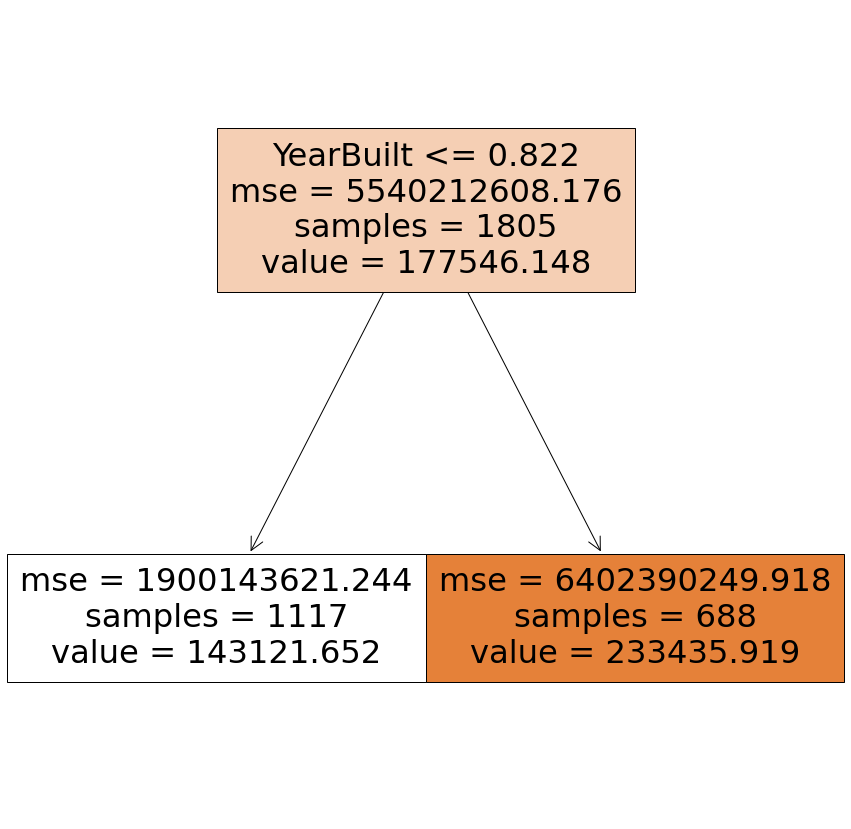

In [16]:
# Visualize the decision tree
plt.figure(figsize=(15,15))
plot_tree(tree_model,feature_names=x.columns,filled=True)
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(train_data_tree, train_target_tree)

train_preds = rf_model.predict(train_data_tree)
train_mse = mean_squared_error(train_target_tree,train_preds)
print('Train set MSE is {:.3f}'.format(train_mse))
print('Train set R2 is {:.3f}'.format(rf_model.score(train_data_tree, train_target_tree)))

test_preds = rf_model.predict(test_data_tree)
test_mse = mean_squared_error(test_target_tree,test_preds)
print('Test set MSE is {:.3f}'.format(test_mse))
print('Test set R2 is {:.3f}'.format(rf_model.score(test_data_tree,test_target_tree)))

Train set MSE is 56004171.255
Train set R2 is 0.989
Test set MSE is 516859858.111
Test set R2 is 0.908


In [12]:
def calc_feature_importances(model,feat_names,num_to_show):
    # Determine the relative importance of each feature using the random forest model
    importances = model.feature_importances_
    # Get an array of the indices that would sort "importances" in reverse order to get largest to smallest
    indices = np.argsort(importances)[::-1]
    ranked_feats = []
    for i in range(len(indices)):
        feat_name = feat_names[indices[i]]
        ranked_feats.append(feat_name)
    RF_ranking = pd.DataFrame()
    RF_ranking['Feat Index'] = indices
    RF_ranking['Feature'] = ranked_feats
    RF_ranking['Importance'] = np.sort(importances)[::-1]
    display(RF_ranking.iloc[:num_to_show,:])

    # Plot the importance value for each feature
    RF_ranking[:num_to_show][::-1].plot(x='Feature',y='Importance',kind='barh',figsize=(12,7),legend=False,title='RF Feature Importance')
    plt.show()
    return

,Feat Index,Feature,Importance
0,53,TotalLivArea,0.653108
1,33,OverallQual,0.063759
2,39,YearBuilt,0.049863
3,13,ExterQual,0.034932
4,23,KitchenQual,0.030577
5,46,GarageArea,0.023113
6,54,TotalBath,0.014234
7,40,YearRemodAdd,0.013258
8,16,BsmtQual,0.012907
9,52,Bsmt_Unfin_Ratio,0.011127


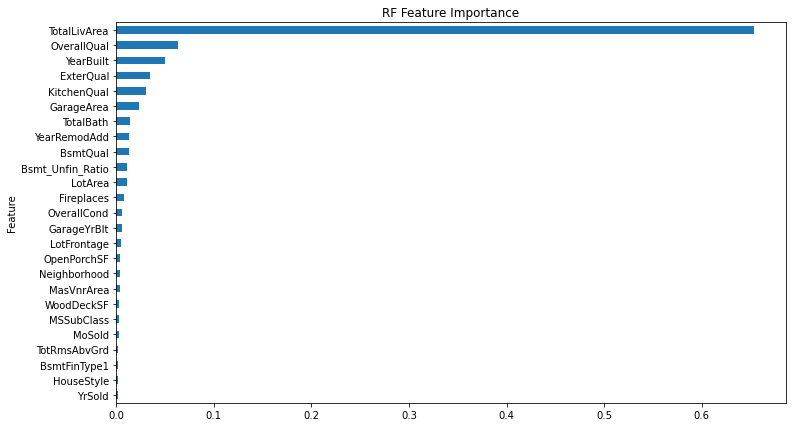

In [13]:
rf_model = RandomForestRegressor()
rf_model.fit(train_data_tree, train_target_tree)
top_feats = 25
calc_feature_importances(rf_model,train_data_tree.columns,top_feats)

In [ ]:
params = {'max_depth':[None,5,10,15],'n_estimators':[1000],
          'max_features':[None, 5, 10, 15],'max_samples':[None, 5, 10, 15]}

model = RandomForestRegressor()
grid_search = GridSearchCV(model,params, cv=5)
grid_search.fit(train_data_tree, train_target_tree)

In [44]:
grid_search.best_params_

{'max_depth': None,
 'max_features': None,
 'max_samples': None,
 'n_estimators': 1000}

In [45]:
grid_search.best_score_

0.8877789162423383

In [ ]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)

train_preds = rf_model.predict(X_train)
train_mse = mean_squared_error(y_train,train_preds)
print('Train set MSE is {:.3f}'.format(train_mse))
print('Train set R2 is {:.3f}'.format(rf_model.score(X_train,y_train)))

test_preds = rf_model.predict(X_test)
test_mse = mean_squared_error(y_test,test_preds)
print('Test set MSE is {:.3f}'.format(test_mse))
print('Test set R2 is {:.3f}'.format(rf_model.score(X_test,y_test)))

In [25]:
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

In [40]:
def ord_enc_func(housing):
    housing = housing.reset_index() #duplicated index values in csv need to reset
    housing = housing.drop('index', axis = 1) # drop original index with duplicates
    price = housing['SalePrice'] # Create Y Variable
    category = housing.select_dtypes('object') #Select all 'object' data types  which are all categorical
    housing_num = housing.select_dtypes(['int64', 'float64']) # Select numeric data types
    housing_num_PID = housing_num['PID'] # PID index should not be scaled, remove and put back later
    ## Numeric Colums to convert
    # MSSubClass, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MoSold, YrSold
    # How to handle MiscVal???
    #Leave YearBuilt and YearRemodAdd as numeric to be scaled
    housing_num = housing_num.drop(['PID', 'SalePrice', 'MSSubClass', 'OverallQual', \
    'OverallCond', 'MoSold', 'YrSold', 'MiscVal'], axis = 1)
    housing_num2cat = housing[['MSSubClass', 'OverallQual', 'OverallCond', \
    'MoSold', 'YrSold', 'MiscVal']]
    category = pd.concat([category.astype(str), housing_num2cat.astype(str)], axis = 1) #Add all categorical features to dataframe to be dummified
    oe = OrdinalEncoder()
    cat_ord_enc = oe.fit_transform(category)
    scaler = MinMaxScaler()
    scaler.fit(housing_num)
    housing_num_scaled = scaler.transform(housing_num)
    housing_num_scaled = pd.DataFrame(housing_num_scaled, columns = housing_num.columns)
    cat_ord_enc =pd.DataFrame(cat_ord_enc, columns = category.columns)
    full_oe_data = pd.concat([housing_num_PID, housing_num_scaled, cat_ord_enc], axis = 1) #Concatenate dummified data and numeric data
    return full_oe_data, pd.DataFrame(price)


In [76]:
x,y = ord_enc_func(cleaned)
x

,PID,GrLivArea,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond,MoSold,YrSold,MiscVal
0,909176150,0.120221,0.162726,0.030802,0.485507,0.000000,0.000000,0.104021,0.000000,0.264555,...,4.0,1.0,9.0,4.0,6.0,6.0,5.0,5.0,4.0,0.0
1,905476230,0.164671,0.071918,0.013718,0.811594,0.566667,0.093125,0.241259,0.257536,0.044521,...,4.0,1.0,9.0,4.0,0.0,5.0,4.0,4.0,3.0,0.0
2,911128020,0.153616,0.133562,0.022249,0.420290,0.950000,0.000000,0.322115,0.000000,0.042808,...,4.0,1.0,9.0,4.0,6.0,5.0,8.0,2.0,1.0,0.0
3,535377150,0.162368,0.202055,0.031999,0.202899,0.883333,0.000000,0.000000,0.000000,0.173373,...,4.0,1.0,9.0,4.0,11.0,4.0,7.0,7.0,3.0,0.0
4,534177230,0.306541,0.167808,0.033186,0.934783,0.850000,0.000000,0.281031,0.000000,0.071490,...,4.0,1.0,9.0,4.0,10.0,8.0,5.0,2.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,903205040,0.142331,0.162726,0.035308,0.318841,0.000000,0.000000,0.000000,0.000000,0.407534,...,4.0,1.0,9.0,4.0,6.0,6.0,5.0,7.0,3.0,0.0
2575,905402060,0.322202,0.162726,0.057865,0.601449,0.083333,0.000000,0.000000,0.000000,0.000000,...,4.0,1.0,9.0,4.0,5.0,3.0,4.0,8.0,3.0,0.0
2576,909275030,0.384155,0.208904,0.023230,0.557971,0.000000,0.000000,0.124126,0.000000,0.306935,...,4.0,1.0,9.0,4.0,15.0,5.0,5.0,10.0,1.0,0.0
2577,907192040,0.347305,0.162726,0.035177,0.927536,0.833333,0.090000,0.367570,0.000000,0.061644,...,4.0,1.0,9.0,4.0,10.0,7.0,4.0,9.0,1.0,0.0


In [77]:
x = x.drop('PID', axis = 1)
x

,GrLivArea,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond,MoSold,YrSold,MiscVal
0,0.120221,0.162726,0.030802,0.485507,0.000000,0.000000,0.104021,0.000000,0.264555,0.266999,...,4.0,1.0,9.0,4.0,6.0,6.0,5.0,5.0,4.0,0.0
1,0.164671,0.071918,0.013718,0.811594,0.566667,0.093125,0.241259,0.257536,0.044521,0.327199,...,4.0,1.0,9.0,4.0,0.0,5.0,4.0,4.0,3.0,0.0
2,0.153616,0.133562,0.022249,0.420290,0.950000,0.000000,0.322115,0.000000,0.042808,0.261073,...,4.0,1.0,9.0,4.0,6.0,5.0,8.0,2.0,1.0,0.0
3,0.162368,0.202055,0.031999,0.202899,0.883333,0.000000,0.000000,0.000000,0.173373,0.126326,...,4.0,1.0,9.0,4.0,11.0,4.0,7.0,7.0,3.0,0.0
4,0.306541,0.167808,0.033186,0.934783,0.850000,0.000000,0.281031,0.000000,0.071490,0.252651,...,4.0,1.0,9.0,4.0,10.0,8.0,5.0,2.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,0.142331,0.162726,0.035308,0.318841,0.000000,0.000000,0.000000,0.000000,0.407534,0.296943,...,4.0,1.0,9.0,4.0,6.0,6.0,5.0,7.0,3.0,0.0
2575,0.322202,0.162726,0.057865,0.601449,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.0,1.0,9.0,4.0,5.0,3.0,4.0,8.0,3.0,0.0
2576,0.384155,0.208904,0.023230,0.557971,0.000000,0.000000,0.124126,0.000000,0.306935,0.312227,...,4.0,1.0,9.0,4.0,15.0,5.0,5.0,10.0,1.0,0.0
2577,0.347305,0.162726,0.035177,0.927536,0.833333,0.090000,0.367570,0.000000,0.061644,0.307236,...,4.0,1.0,9.0,4.0,10.0,7.0,4.0,9.0,1.0,0.0


In [78]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [79]:
tree_model = DecisionTreeRegressor(max_depth = 20, random_state=0)
tree_model.fit(X_train, y_train)
train_preds = tree_model.predict(X_train)
train_mse = mean_squared_error(y_train,train_preds)
print('Train set MSE is {:.3f}'.format(train_mse))
print('Train set R2 is {:.3f}'.format(tree_model.score(X_train,y_train)))

test_preds = tree_model.predict(X_test)
test_mse = mean_squared_error(y_test,test_preds)
print('Test set MSE is {:.3f}'.format(test_mse))
print('Test set R2 is {:.3f}'.format(tree_model.score(X_test,y_test)))


Train set MSE is 4371.761
Train set R2 is 1.000
Test set MSE is 1336043708.195
Test set R2 is 0.771


In [80]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)

train_preds = rf_model.predict(X_train)
train_mse = mean_squared_error(y_train,train_preds)
print('Train set MSE is {:.3f}'.format(train_mse))
print('Train set R2 is {:.3f}'.format(rf_model.score(X_train,y_train)))

test_preds = rf_model.predict(X_test)
test_mse = mean_squared_error(y_test,test_preds)
print('Test set MSE is {:.3f}'.format(test_mse))
print('Test set R2 is {:.3f}'.format(rf_model.score(X_test,y_test)))

<ipython-input-80-24da001b8cf8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Train set MSE is 92889962.852
Train set R2 is 0.983
Test set MSE is 509070867.344
Test set R2 is 0.913


In [ ]:
params = [{
    "n_estimators": [25, 50, 100],
    "min_samples_leaf": range(1, 10),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int)}]

model = RandomForestRegressor()
grid_search = GridSearchCV(model,params)
grid_search.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

In [88]:
grid_search.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 25,
 'random_state': 42}

In [90]:
rf_model = RandomForestRegressor(min_samples_leaf= 1, min_samples_split =  2, n_estimators=25)
rf_model.fit(X_train, y_train)

train_preds = rf_model.predict(X_train)
train_mse = mean_squared_error(y_train,train_preds)
print('Train set MSE is {:.3f}'.format(train_mse))
print('Train set R2 is {:.3f}'.format(rf_model.score(X_train,y_train)))

test_preds = rf_model.predict(X_test)
test_mse = mean_squared_error(y_test,test_preds)
print('Test set MSE is {:.3f}'.format(test_mse))
print('Test set R2 is {:.3f}'.format(rf_model.score(X_test,y_test)))

<ipython-input-90-3cdfc26c8b3d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Train set MSE is 117391913.484
Train set R2 is 0.979
Test set MSE is 543775090.771
Test set R2 is 0.907


In [ ]:
#params = {'min_samples_leaf':[1,3,10],'n_estimators':[100,1000],
          #'max_features':[0.1,0.5,1.],'max_samples':[0.5,None]}

In [85]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': None,
 'max_samples': None,
 'min_samples_leaf': 1,
 'n_estimators': 1000}

<ipython-input-86-de48fd04c7b6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Train set MSE is 89343018.000
Train set R2 is 0.984
Test set MSE is 513501902.079
Test set R2 is 0.912
